In [73]:
!pip install scipy #numpy pandas matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 48.8 MB/s eta 0:00:00:00:0100:01


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp

ModuleNotFoundError: No module named 'scipy'

In [3]:
df = pd.read_csv('medical_examination.csv')
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [4]:
overweight = lambda x: 1 if x > 25 else 0 
print(overweight(26))

1


In [5]:
df["overweight"] = df.apply(lambda row: overweight(row['weight'] / ((row['height'] / 100) ** 2)), axis=1)

In [6]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [7]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'overweight'],
      dtype='object')

In [8]:
for item in df.columns:
    if item == 'cholesterol' or item == 'gluc':
    # Apply the normalization
        normalize_zero = df[item] == 1
        normalize_one = df[item] > 1
        df.loc[normalize_zero, item] = 0
        df.loc[normalize_one, item] = 1

In [9]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.

In [10]:
 df_cat = pd.melt(df,
      id_vars=["id", "cardio"],
      value_vars=["cholesterol", "gluc", "smoke", "alco", "active", "overweight"],
   )
    #var_name="Product",
    #value_name="Sales",)

In [11]:
 df_cat.head()

,id,cardio,variable,value
0,0,0,cholesterol,0
1,1,1,cholesterol,1
2,2,1,cholesterol,1
3,3,1,cholesterol,0
4,4,0,cholesterol,0


In [12]:
df_group = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

In [15]:
df_group

,cardio,variable,value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


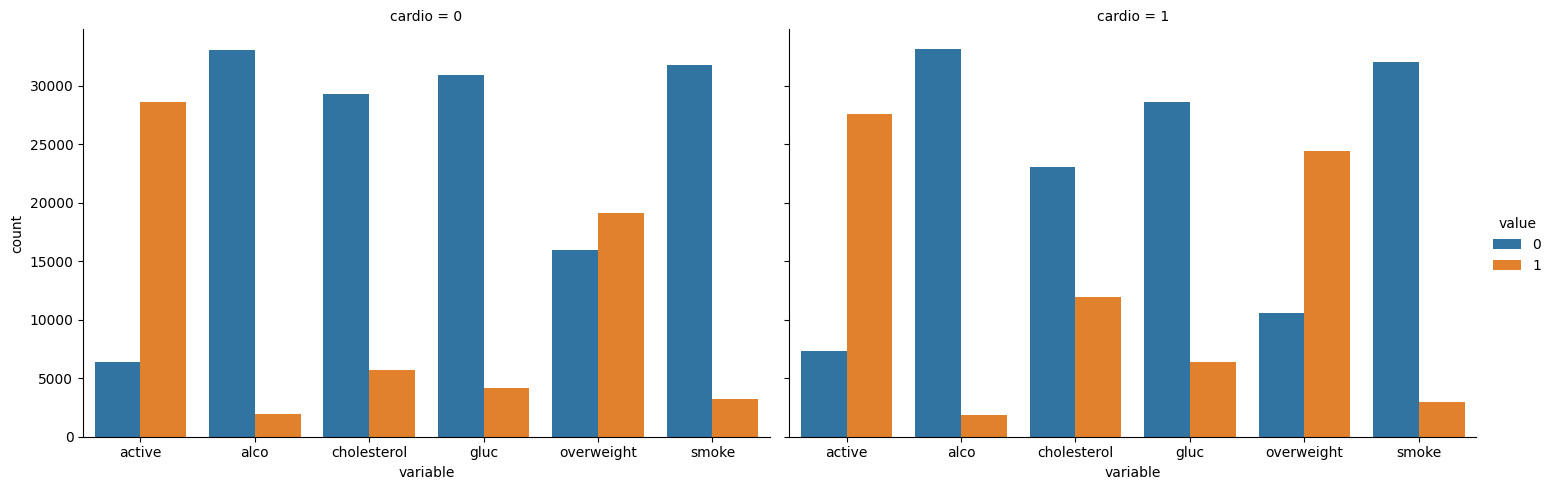

In [18]:
sns.catplot(x='variable', y='count', hue='value', col='cardio', kind='bar', data=df_group, height=5, aspect=1.5)
plt.show()

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
ax1.bar()

In [95]:
df_heat = df.copy()
df_heat = df_heat[
    (df['ap_lo'] <= df['ap_hi']) &
    (df_heat['height'] >= df_heat['height'].quantile(0.025)) & 
    (df_heat['height'] <= df_heat['height'].quantile(0.975)) &
    (df_heat['weight'] >= df_heat['weight'].quantile(0.025)) &
    (df_heat['weight'] <= df_heat['weight'].quantile(0.975))
]
print(df_heat.shape)

(64352, 14)


(70000, 14)
(68463, 14)
(67024, 14)
(65535, 14)
(63973, 14)


In [96]:
# Calculate the correlation matrix
corr = df_heat.corr(method='kendall', numeric_only=True)
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.000895,0.003275,0.000233,0.000902,0.004930,0.001229,0.003193,0.001933,-0.002309,-0.000230,0.004993,0.003283,0.000021
age,0.000895,1.000000,-0.012050,-0.050748,0.047085,0.160485,0.118623,0.104539,0.071651,-0.035915,-0.023039,-0.009729,0.192685,0.069133
sex,0.003275,-0.012050,1.000000,0.426629,0.116878,0.052839,0.055771,-0.036555,-0.020480,0.337345,0.168635,0.007633,0.003351,-0.052585
height,0.000233,-0.050748,0.426629,1.000000,0.187611,0.003425,0.010708,-0.053623,-0.026572,0.156547,0.073275,-0.003888,-0.019911,-0.125083
weight,0.000902,0.047085,0.116878,0.187611,1.000000,0.192463,0.179616,0.109133,0.084320,0.050339,0.049861,-0.009607,0.140821,0.584304
ap_hi,0.004930,0.160485,0.052839,0.003425,0.192463,1.000000,0.657729,0.177170,0.086009,0.022742,0.026315,0.001399,0.398641,0.181824
ap_lo,0.001229,0.118623,0.055771,0.010708,0.179616,0.657729,1.000000,0.146254,0.069159,0.021859,0.033080,0.005195,0.327837,0.166818
cholesterol,0.003193,0.104539,-0.036555,-0.053623,0.109133,0.177170,0.146254,1.000000,0.384607,0.012849,0.039549,0.003747,0.203611,0.129020
gluc,0.001933,0.071651,-0.020480,-0.026572,0.084320,0.086009,0.069159,0.384607,1.000000,-0.003269,0.015504,-0.008916,0.087960,0.088260
smoke,-0.002309,-0.035915,0.337345,0.156547,0.050339,0.022742,0.021859,0.012849,-0.003269,1.000000,0.341345,0.027790,-0.019529,-0.003254


In [97]:
mask = np.triu(np.ones_like(corr, dtype=bool))

[Text(0, 0.5, 'id'),
 Text(0, 1.5, 'age'),
 Text(0, 2.5, 'sex'),
 Text(0, 3.5, 'height'),
 Text(0, 4.5, 'weight'),
 Text(0, 5.5, 'ap_hi'),
 Text(0, 6.5, 'ap_lo'),
 Text(0, 7.5, 'cholesterol'),
 Text(0, 8.5, 'gluc'),
 Text(0, 9.5, 'smoke'),
 Text(0, 10.5, 'alco'),
 Text(0, 11.5, 'active'),
 Text(0, 12.5, 'cardio'),
 Text(0, 13.5, 'overweight')]

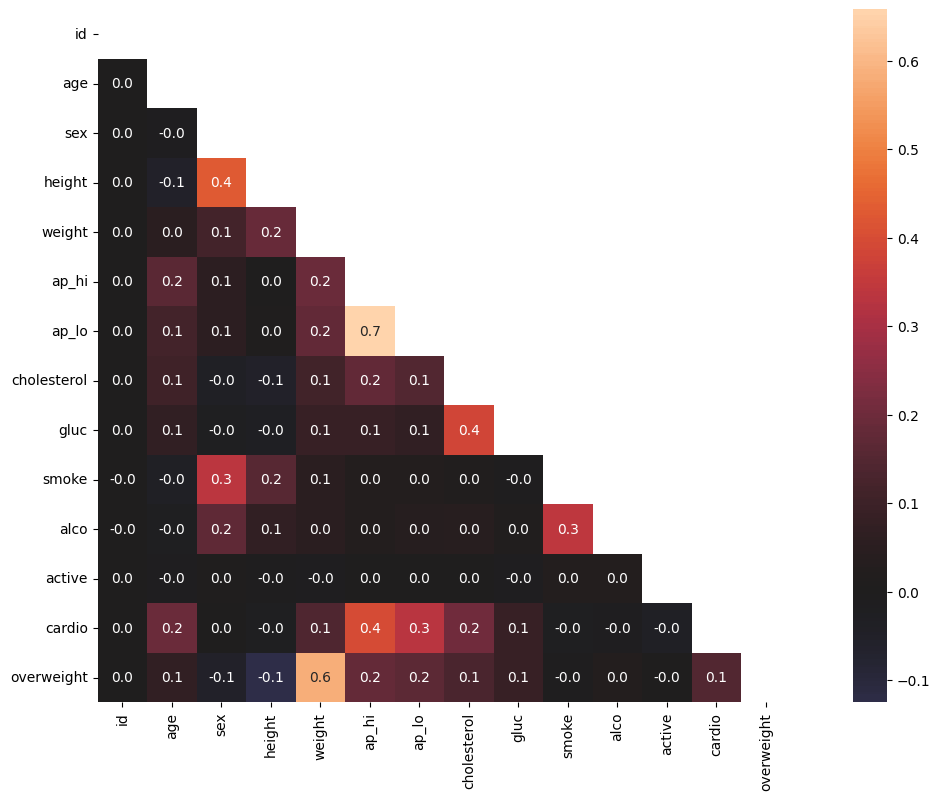

In [98]:
fig, ax = plt.subplots(figsize=(16, 9))

plt.xticks(rotation=90) 


# Create the heatmap with Seaborn
heatmap = sns.heatmap(
    corr, mask=mask,
    center=0, annot=True,
    square=True, fmt=".1f",
    ax=ax  # Specify the axis to plot on
)

ax.set_yticklabels(labels=df_heat.columns, rotation=0)
